In [4]:
from src.Funciones import *

#### Cómo ejemplo cargaremos 2 redes cristalinas, una inportando un documento VASP y otra ingresando los parametros manualmente.

##### Primero cargaremos una red desde un archivo VASP

Se leerá el archivo grafeno.vasp
--Red creada a partir del archivo 'grafeno.vasp'--


C: Graphite Lattice

1.0
        2.4410462379         0.0000000000         0.0000000000
        -1.2205231190         2.1140080539         0.0000000000
        0.0000000000         0.0000000000         10.0000000000
	C
	2
Direct
     0.6666666660         0.3333333330         0.1001000000
     0.3333333430         0.6666666870         0.1001000000


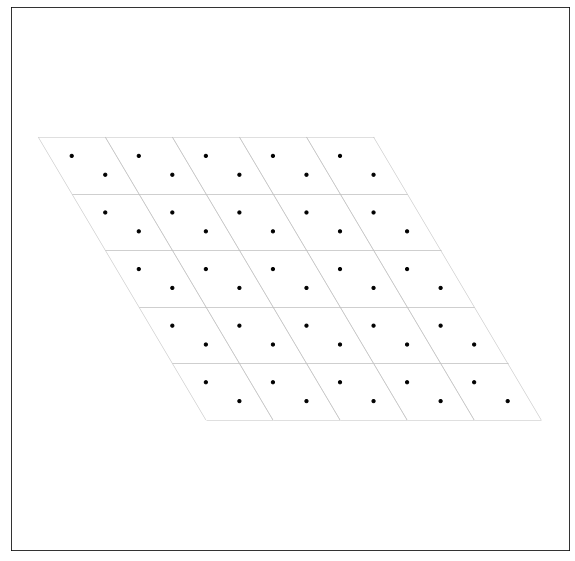

1

In [12]:
# Usamos el método 'importa()', el cual tiene por entrada el archivo que va a cargar
# y por salida la red correspondiente. En este caso usaremos el archivo 'grafeno.VASP'.
# Si termina correctamente lo dirá en pantalla. 
r1=importa('grafeno')
print('\n')

# Si imprimimos en pantalla una Red con el método 'print()' se desplega en formato VASP,
# aquí podemos verificar que la red se cargó correctamemnte.
print(r1)

# Por último si usamos en la red el método printXY(m,n), se mostrará en pantalla una
# proyección 2D de la red repitiendose m veces en el vector a y n veces en el vector b
# Aquí no se mostrarán los enlaces dado que estos no se obtienen automaticamente.
r1.showXY(5,5)

##### Ahora definimos manualmente una Red de α-GeSe.

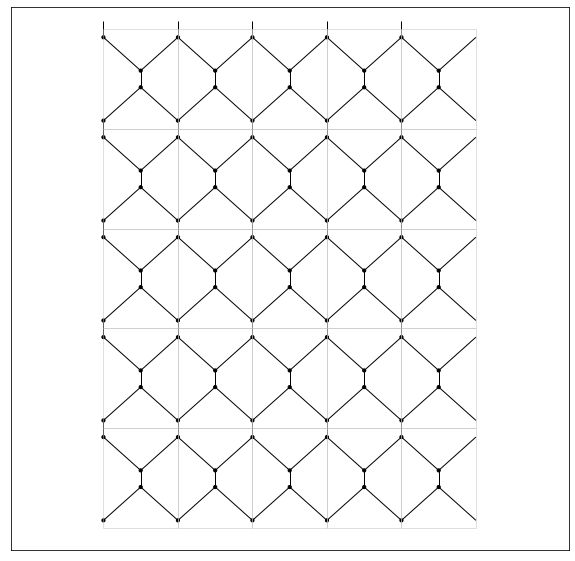

1

In [3]:
# Creamos primero las posiciones relativas de los átomos en terminos de los Vectores primitivos.
p1,p2=(0.000000000,0.913483083),(0.500000000,0.579813302)
p3,p4=(0.000000000,0.079836130),(0.500000000,0.413437814)

# Ahora definimos la lista de los átomos en la celda primitiva del fosforeno negro,
# los cuales son 4 átomos de fosforo (P), dado que se encuentran todos en distintas
# posiciones relativas al vector c lo indicamos en el parametro posZ.
ats = [Atomo(p1,sig='P',posZ=0.266835123),
       Atomo(p2,sig='P',posZ=0.266945183),
       Atomo(p3,sig='P',posZ=0.181006327),
       Atomo(p4,sig='P',posZ=0.181094214)]

# Creamos la lista de enlaces
enl=[(p1,p2),(p3,p4),(p2,p4),
     (p2,sumaV(p1,(1.0,0.0))),
     (p4,sumaV(p3,(1.0,0.0))),
     (p1,sumaV(p3,(0.0,1.0)))]

# Ahora definimos los vectores primitivos a y b de la red
a = (3.3061099052,0.0000000000)
b = (0.0000000000,4.552418232)

# Y finalmente iniciamos la red bPh con los valores requeridos.
bPh = Red(a,b,atms=ats, enls=enl,name='Black-Phosphorene')
bPh.showXY(5,5,t=10)

In [14]:
print(bPh)

Black-Phosphorene
1.0
        3.3061099052         0.0000000000         0.0000000000
        0.0000000000         4.5524182320         0.0000000000
        0.0000000000         0.0000000000         10.0000000000
	P
	4
Direct
     0.0000000000         0.9134830830         0.2669351230
     0.5000000000         0.5798133020         0.2670451830
     0.0000000000         0.0798361300         0.1811063270
     0.5000000000         0.4134378140         0.1811942140


In [159]:
def tira(n,dif,show=False):
    score = 0
    legend="Tirada:["
    for i in range(n):
        r=random.randint(1, 10)
        legend=legend+" "+str(r)
        if(r==1):score-=1
        elif(r>=dif):
            score+=1
            #if(r==10):
            #    rx=random.randint(1, 10)
            #    if rx>=dif:score+=1
    if score<0:
        if show:print(legend+" ] :-> FAILL")
        return 0
    if score>2:
        if show:print(legend+" ] :-> WIN")
        return 1
    if show:print(legend+" ] :-> NAH")
    return 2

def pruebas(n,dif,rep):
    reg=[0,0,0]
    for i in range(rep):
        r=tira(n,dif)
        reg[r]=reg[r]+1
    return "Failure:{:.4f}%\tExito:{:.4f}%".format((reg[0]/rep)*100,(reg[1]/rep)*100),(reg[0]/rep)*100,(reg[1]/rep)*100,(reg[2]/rep)*100

In [160]:
resF=[]
resE=[]
for d in range(6,11):
    filaF=[]
    filaE=[]
    for n in range(3,11):
        rp,pf,pe,pn = pruebas(n,d,1000000)
        print("{} dados dificultad {}:(nulos {:.4f}%)\n\t".format(n,d,pn)+str(rp))
        filaF.append(pf)
        filaE.append(pe)
    resF.append(filaF)
    resE.append(filaE)
resF=np.array(resF)
resE=np.array(resE)

3 dados dificultad 6:(nulos 79.8412%)
	Failure:7.6230%	Exito:12.5358%
4 dados dificultad 6:(nulos 67.4461%)
	Failure:6.3019%	Exito:26.2520%
5 dados dificultad 6:(nulos 56.0916%)
	Failure:5.1650%	Exito:38.7434%
6 dados dificultad 6:(nulos 46.4442%)
	Failure:4.1948%	Exito:49.3610%
7 dados dificultad 6:(nulos 38.0969%)
	Failure:3.4745%	Exito:58.4286%
8 dados dificultad 6:(nulos 31.3722%)
	Failure:2.8720%	Exito:65.7558%
9 dados dificultad 6:(nulos 25.7737%)
	Failure:2.3829%	Exito:71.8434%
10 dados dificultad 6:(nulos 21.3028%)
	Failure:1.9616%	Exito:76.7356%
3 dados dificultad 7:(nulos 83.3002%)
	Failure:10.2987%	Exito:6.4011%
4 dados dificultad 7:(nulos 75.3839%)
	Failure:9.2421%	Exito:15.3740%
5 dados dificultad 7:(nulos 67.1168%)
	Failure:8.2573%	Exito:24.6259%
6 dados dificultad 7:(nulos 59.2230%)
	Failure:7.2990%	Exito:33.4780%
7 dados dificultad 7:(nulos 52.0957%)
	Failure:6.3678%	Exito:41.5365%
8 dados dificultad 7:(nulos 45.7490%)
	Failure:5.6339%	Exito:48.6171%
9 dados dificultad 

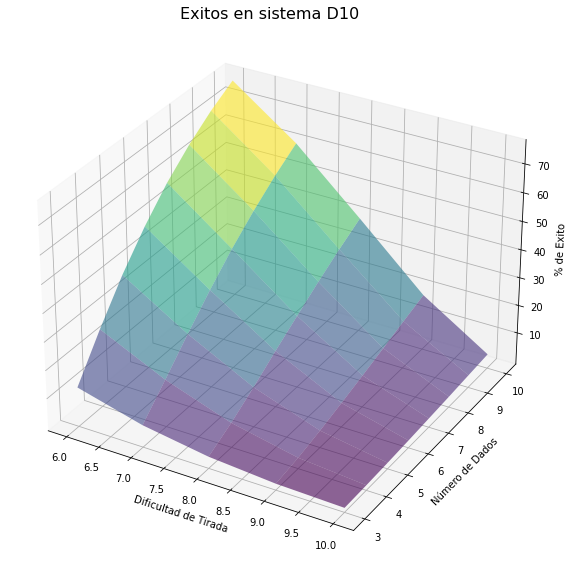

In [161]:
fig=plt.figure()
ax=plt.axes(projection='3d')

x=np.linspace(3,10,(10-2))
y=np.linspace(6,10,(10-5))

X,Y = np.meshgrid(x,y)

ax.plot_surface(Y,X,resE,cmap="viridis",alpha=0.6)
ax.set_xlabel("Dificultad de Tirada")
ax.set_ylabel("Número de Dados")
ax.set_zlabel("% de Exito")
fig.suptitle("Exitos en sistema D10",y=0.9,fontsize=16)
plt.show()

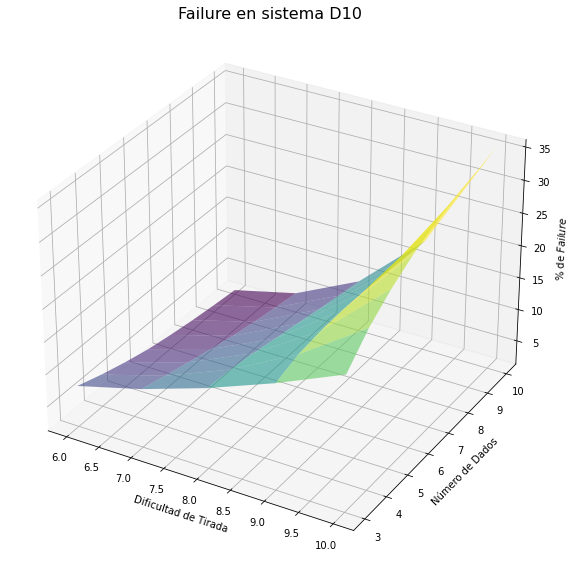

In [162]:
fig=plt.figure()
ax=plt.axes(projection='3d')

x=np.linspace(3,10,(10-2))
y=np.linspace(6,10,(10-5))

X,Y = np.meshgrid(x,y)

ax.plot_surface(Y,X,resF,cmap="viridis",alpha=0.6)
ax.set_xlabel("Dificultad de Tirada")
ax.set_ylabel("Número de Dados")
ax.set_zlabel("% de $Failure$")
fig.suptitle("Failure en sistema D10",y=0.9,fontsize=16)
plt.show()

In [163]:
leyend = "Exitos en sistema D10"
print(leyend)
table = PrettyTable(["Dif","3Dados","4Dados","5Dados","6Dados", "7Dados","8Dados","9Dados","10Dados"])
for d in range(len(resE)):
    lin=[str(d+6)]
    for n in range(len(resE[0])):
        lin.append(str(round(resE[d][n],1))+"%")
    table.add_row(lin)
print(table)
leyend = "'Failures' en sistema D10"
print(leyend)
table = PrettyTable(["Dif","3Dados","4Dados","5Dados","6Dados", "7Dados","8Dados","9Dados","10Dados"])
for d in range(len(resE)):
    lin=[str(d+6)]
    for n in range(len(resE[0])):
        lin.append(str(round(resF[d][n],1))+"%")
    table.add_row(lin)
print(table)


Exitos en sistema D10
+-----+--------+--------+--------+--------+--------+--------+--------+---------+
| Dif | 3Dados | 4Dados | 5Dados | 6Dados | 7Dados | 8Dados | 9Dados | 10Dados |
+-----+--------+--------+--------+--------+--------+--------+--------+---------+
|  6  | 12.5%  | 26.3%  | 38.7%  | 49.4%  | 58.4%  | 65.8%  | 71.8%  |  76.7%  |
|  7  |  6.4%  | 15.4%  | 24.6%  | 33.5%  | 41.5%  | 48.6%  | 54.9%  |  60.4%  |
|  8  |  2.7%  |  7.3%  | 12.8%  | 18.6%  | 24.3%  | 29.8%  | 35.0%  |  39.7%  |
|  9  |  0.8%  |  2.4%  |  4.6%  |  7.2%  |  9.9%  | 12.7%  | 15.6%  |  18.4%  |
|  10 |  0.1%  |  0.3%  |  0.7%  |  1.2%  |  1.7%  |  2.3%  |  3.0%  |   3.6%  |
+-----+--------+--------+--------+--------+--------+--------+--------+---------+
'Failures' en sistema D10
+-----+--------+--------+--------+--------+--------+--------+--------+---------+
| Dif | 3Dados | 4Dados | 5Dados | 6Dados | 7Dados | 8Dados | 9Dados | 10Dados |
+-----+--------+--------+--------+--------+--------+--------+

In [218]:
def califica(tiro,dif):
    score = 0
    for t in tiro:
        if(t==1):score-=1
        elif(t>=dif):
            score+=1
            #if(r==10):
            #    rx=random.randint(1, 10)
            #    if rx>=dif:score+=1
    if score<0:
        return 0
    if score>2:
        return 1
    return 2

def tiros(tpas):
    if tpas==[]:
        return [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
    tant=tpas
    res=[]
    for i in range(1,11):
        for j in tant:
            l=j.copy()
            l.append(i)
            res.append((l))
    return res

def tira(mx):
    tiradas=[]
    lista=[]
    for i in range(mx+1):
        lista=tiros(lista)
        if i>2:
            tiradas.append(lista)
    return tiradas

def proba(n,d):
    lista=tiros(n)
    res=[0,0,0]
    for t in lista:
        c = califica(t,d)
        res[c]=res[c]+1
    return res

def proba2(lista):
    tab = []
    for d in range(6,11):
        res=[0,0,0]
        for t in lista:
            c = califica(t,d)
            res[c]=res[c]+1
        tab.append([(res[0]/len(lista))*100,(res[1]/len(lista))*100,(res[2]/len(lista))*100])
    return tab


In [210]:
proba(5,7)

[8231, 24704, 67065]

In [217]:
proba2(t)

[[5.176, 38.75, 56.074],
 [8.231, 24.704, 67.065],
 [12.736, 12.798000000000002, 74.466],
 [19.231, 4.5920000000000005, 76.17699999999999],
 [28.376, 0.6859999999999999, 70.938]]

In [227]:
t3=tiros(tiros(tiros([])))
print("Terminado t3, tam={}".format(len(t3)))
t4=tiros(t3)
print("Terminado t4, tam={}".format(len(t4)))
t5=tiros(t4)
print("Terminado t5, tam={}".format(len(t5)))
t6=tiros(t5)
print("Terminado t6, tam={}".format(len(t6)))
t7=tiros(t6)
print("Terminado t7, tam={}".format(len(t7)))
t8=tiros(t7)
print("Terminado t8, tam={}".format(len(t8)))
t9=tiros(t8)
print("Terminado t9, tam={}".format(len(t9)))
t10=tiros(t9)
print("Terminado t10, tam={}".format(len(t10)))

Terminado t3, tam=1000
Terminado t4, tam=10000
Terminado t5, tam=100000
Terminado t6, tam=1000000
Terminado t7, tam=10000000


KeyboardInterrupt: 